<a href="https://colab.research.google.com/github/jolveres/deep_learning_escuela_verano_19/blob/master/notebooks/CNN_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

#!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import time
import matplotlib.pyplot as plt
import os
import h5py
from sklearn.model_selection import train_test_split



Importamos todas las librerías necesarias para el uso de nuestra red:

La librerias son:

1. tensorflow 2.0 con sus respectivas implementaciones sobre Keras
2. numpy para manejo de arreglos
3. time para para medir el tiempo de ejecución
4. matplotlib para visualizar imagenes
5. os para manejo de directorios
6. h5py cargar datos de imágenes
7. sklearn como libreria auxiliar para separar nuestros datos en validación y entranamiento.



In [0]:
device_name = tf.test.gpu_device_name()

print(device_name)


/device:GPU:0


Verificamos el uso de GPU en Colab

In [0]:
# Ejecuta esta celda para activar tu cuenta de Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Montamos la unidad de Google Drive para uso local

In [0]:
!ls "/content/drive/My Drive/BaseCancer/"

arq.PNG  benign  cancer_histo.hdf5  label_cancer.hdf5  malignant


Verificamos el contenido del Drive

In [0]:
DATADIR = "/content/drive/My Drive/BaseCancer"
CATEGORIES = ["benign", "malignant"]
training_data = []
label_data=[]

Definimos Variables Globales

In [0]:
def create_training_data():
  
    datasource = os.path.join(DATADIR, 'cancer_histo.hdf5')
    with h5py.File(datasource, 'r') as f:
      data = f['default']
      database = np.array(data)
    
    labessource = os.path.join(DATADIR, 'label_cancer.hdf5')
    with h5py.File(labessource, 'r') as f:
      data = f['default']
      labels = np.array(data)
    
    print(labels.shape)
      
    xTrain, xTest, yTrain, yTest = train_test_split(database, labels, test_size = 0.25, random_state = 0)
    xTrain = np.array(xTrain)
    xTest = np.array(xTest)
    yTrain = np.array(yTrain)
    yTest = np.array(yTest)
    return (xTrain, yTrain), (xTest, yTest)

Función para cargar la base de datos

(7909,)
loaded in 0 [min] 15 [s]
(5931,) (5931, 256, 256, 3)


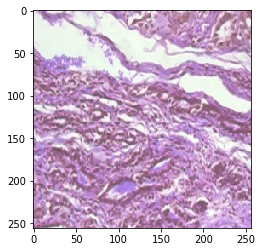

0 1 1 1 0


In [0]:
st = time.time()
(x,y),(z,w) = create_training_data()
elapsed_time = time.time() - st
elapsed_time_minutes = int(int(elapsed_time) / 60)
elapsed_time_seconds = int(elapsed_time) % 60
print('loaded in %s [min] %s [s]' % (elapsed_time_minutes, elapsed_time_seconds))
print(y.shape, x.shape)
img_rev = x[0,:,:,:]
plt.imshow(img_rev)
plt.show()
print (y[0], y[1], y[2], w[0], w[2])

In [0]:
def normalize(x_train, x_test, y_train, y_test):

    x_train = np.array(x_train, dtype=np.float32)
    x_test = np.array(x_test, dtype=np.float32)
    y_train = np.array(y_train, dtype=np.float32)
    y_test = np.array(y_test, dtype=np.float32)


    (a, b, c, d) = x_train.shape
    for i in range(a):
        x_train[i, :, :, 0] /= 255
        x_train[i, :, :, 1] /= 255
        x_train[i, :, :, 2] /= 255

    (a, b, c, d) = x_test.shape
    for i in range(a):
        x_test[i, :, :, 0] /= 255
        x_test[i, :, :, 1] /= 255
        x_test[i, :, :, 2] /= 255

    return (x_train,y_train),(x_test,y_test)

Función para normalizar los datos entre 0-1

In [0]:
def main():

    st = time.time()
    (train_images, train_labels), (test_images, test_labels) = create_training_data()


    print("loading data......")
    elapsed_time = time.time() - st
    elapsed_time_minutes = int(int(elapsed_time) / 60)
    elapsed_time_seconds = int(elapsed_time) % 60
    print('loaded in %s [min] %s [s]' % (elapsed_time_minutes, elapsed_time_seconds))


    # Normalize pixel values to be between 0 and 1
    st = time.time()
    (train_images, train_labels), (test_images, test_labels) = normalize(train_images,test_images,train_labels,test_labels)
    elapsed_time = time.time() - st
    elapsed_time_minutes = int(int(elapsed_time) / 60)
    elapsed_time_seconds = int(elapsed_time) % 60
    print('normalize data in %s [min] %s [s]' % (elapsed_time_minutes, elapsed_time_seconds))

    # Model CNN with dropout
    model = models.Sequential()
    #aqui cambiar numero de filtros donde dice 16,32,64, y en la capa densa poner el ultimo valor (64) y la ultima densa queda en 2s
    model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(256,256,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='softmax'))

    model.summary()

    #training process
    model.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    #testing process
    model.fit(train_images, train_labels, epochs=5, batch_size=32)
    test_loss, test_acc = model.evaluate(test_images, test_labels)

Definimos la arquitectura en TF 2.0:

---




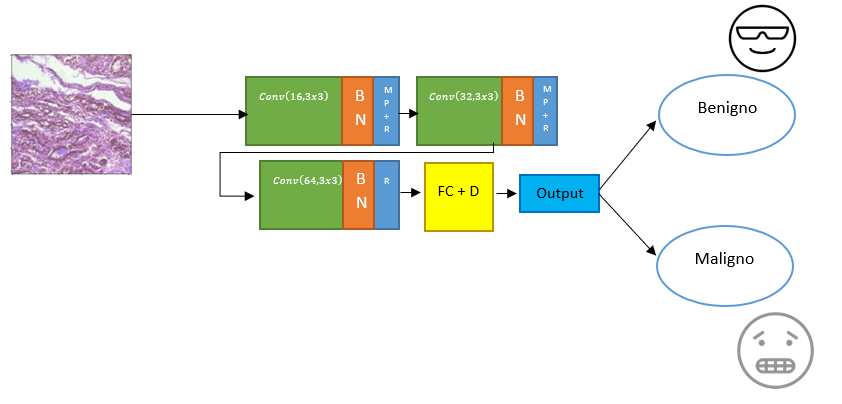

In [0]:
Image("arq (1).PNG")

In [0]:
main()

(7909,)
loading data......
loaded in 0 [min] 4 [s]


W0622 15:38:04.003718 140075886921600 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


normalize data in 0 [min] 6 [s]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)       